In [30]:
import pathlib as pl
import warnings
warnings.simplefilter("ignore")
from utils.analysis_utils import load_hyperparameters, fit_model_from_hyperparameters
mpl.style.use('mystyle.mplstyle')
from utils.plotting_utils import  plot_all_models_from_hyperparameters, plot_data, plot_log_marginal_likelihoods_of_restarts

full_width = 5.5984252
page_height = 7.85
halfwidth = 2.645669

# Notebook for Plotting Predictions from Saved Hyperparameters and the Log Marginal Likelihoods of each Initialisation

Plot the predictions of each of the models for a given certain surface type, seed and number of points

In [31]:
surface_type = 'linear_relation'
test_type = 'two_observed_10_new'
n_new_points = 8
seed = 3
dataseed = 3

path = pl.Path.home()/ \
       f'Transfer_Learning_GP_Results/hyperparameters/hyperparameters_{surface_type}_{test_type}_{n_new_points}_points_seed_{seed}_dataseed_{dataseed}.pkl'

hyperparams = load_hyperparameters(path)

In [32]:
hyperparams['final_lml'] = [hyperparams['lmls'].to_numpy()[i][-1] for i in range(len(hyperparams))]

Plot the data generating function


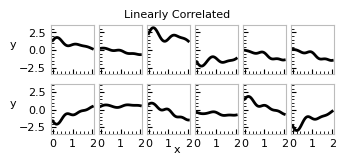

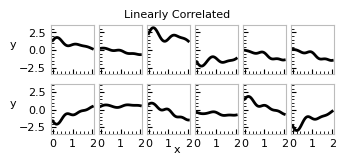

In [33]:
plot_data(hyperparams, surface_type, test_type, dataseed, seed, plot_data_points=False)

create each model from the saved hyperparameter

In [34]:


gps = {model_name: None for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']}
for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
       print(model_name)
       mod_df = hyperparams[hyperparams['model'] == model_name]
       gps[model_name] = fit_model_from_hyperparameters(mod_df)

mo_indi
build complete
assignment complete
avg
build complete
assignment complete
lmc
build complete
assignment complete
lvmogp
build complete
assignment complete


Make predictions and plot each model

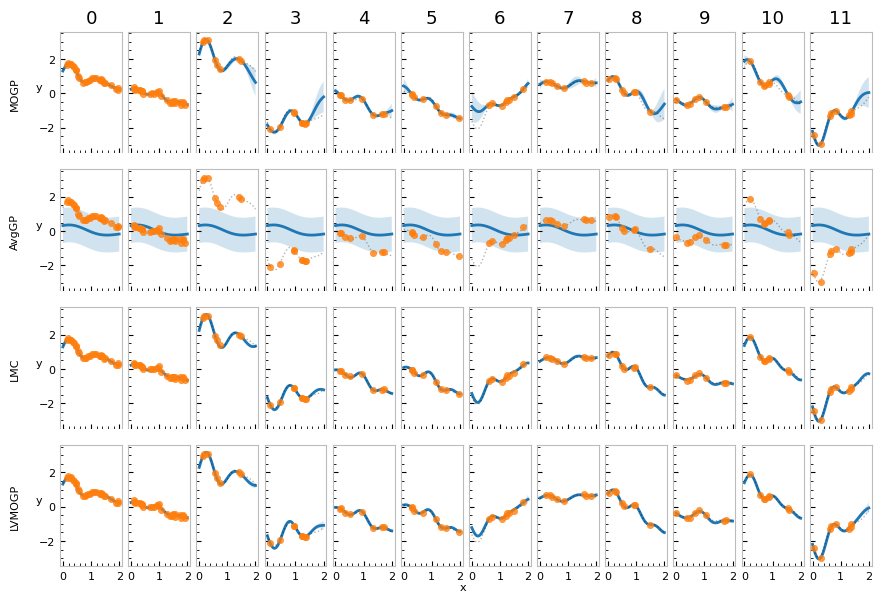

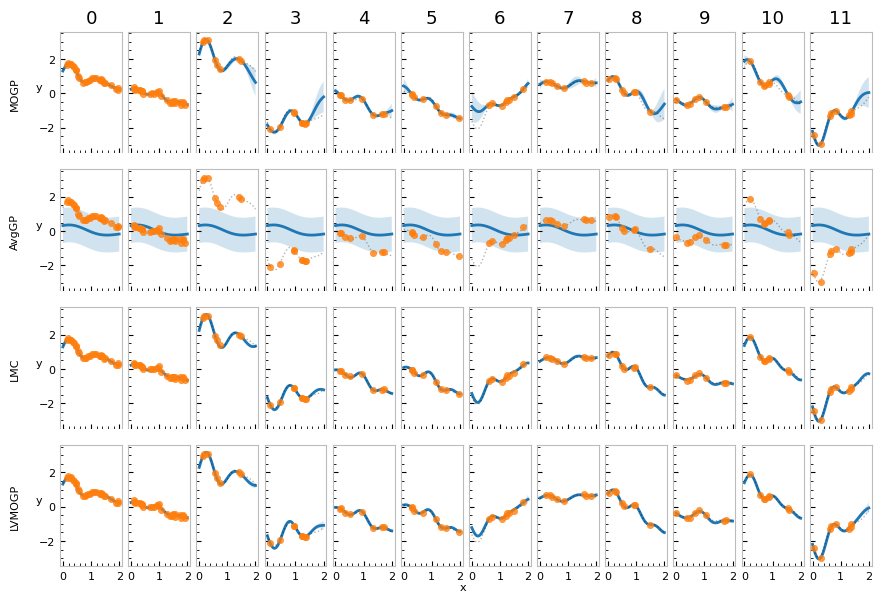

In [35]:
plot_all_models_from_hyperparameters(gps, hyperparams, plot_new_ys=False, save_fig=False, save_path=None)

For the log marginal likelihoods, first load all the hyperparameter pickles, then make plots

In [36]:
from utils.analysis_utils import load_all_hyperparameters

hyp_df = load_all_hyperparameters()
hyp_df['final_lml'] = [hyp_df['lmls'].to_list()[i][-1] for i in range(len(hyp_df))]

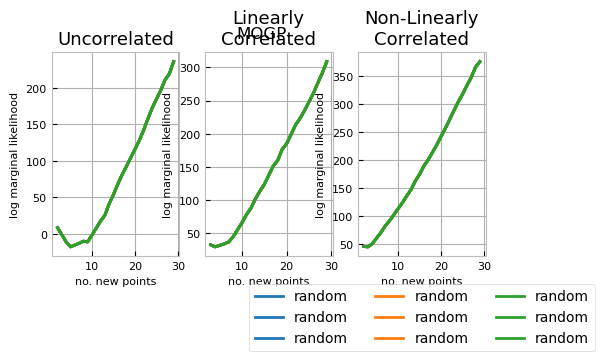

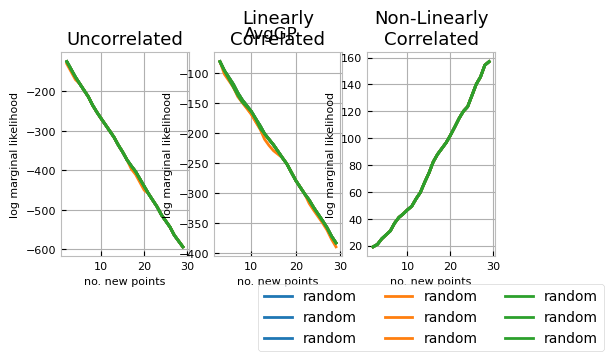

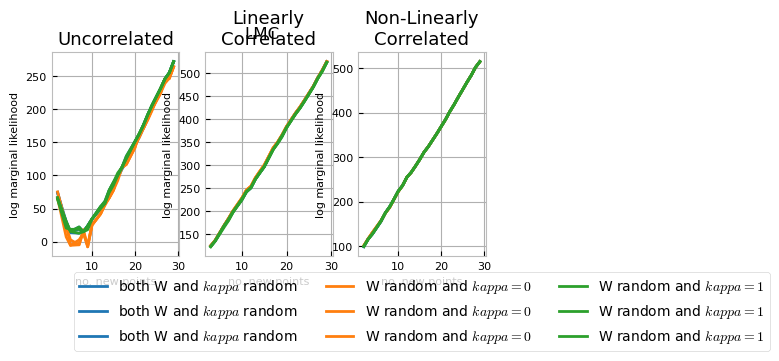

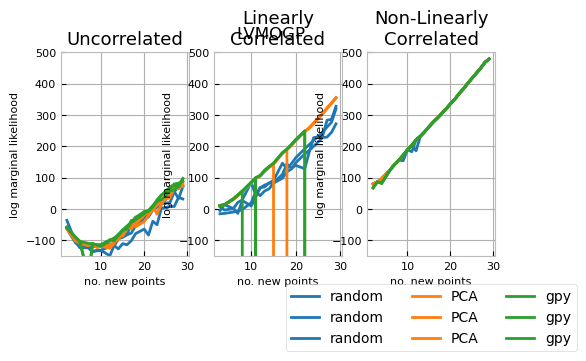

In [37]:
import os
import matplotlib.pyplot as plt
seed = 2
data_seed = 3

plot_log_marginal_likelihoods_of_restarts(hyp_df, seed, data_seed, save=True, path=pl.Path(os.getcwd())/'plots',
                                          file_name=f'log_marginal_likelihoods')
plt.show()

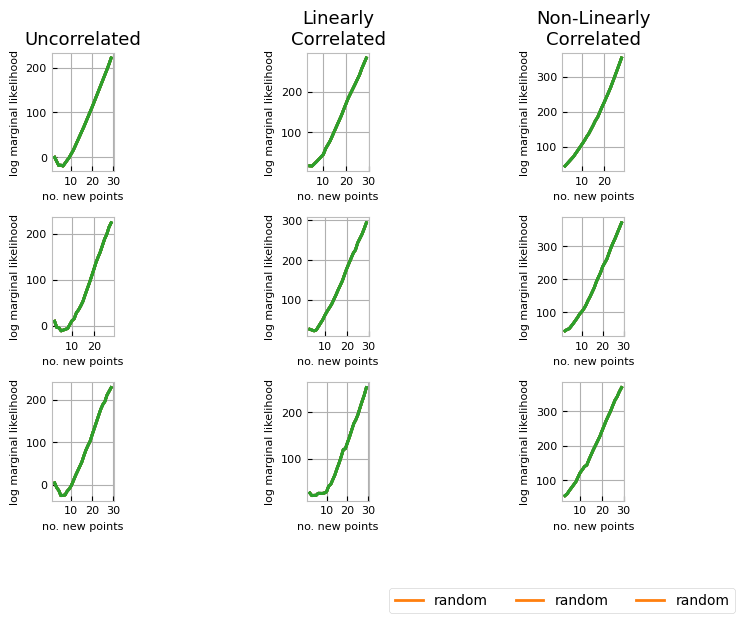

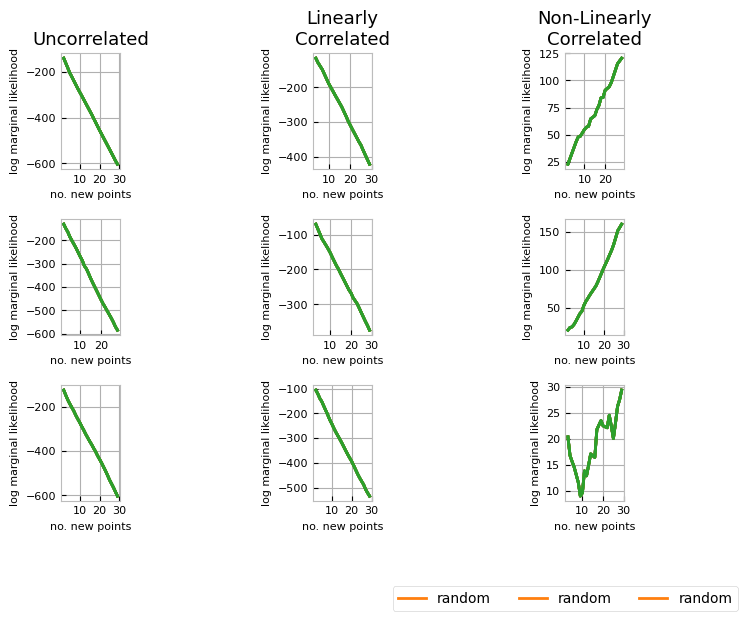

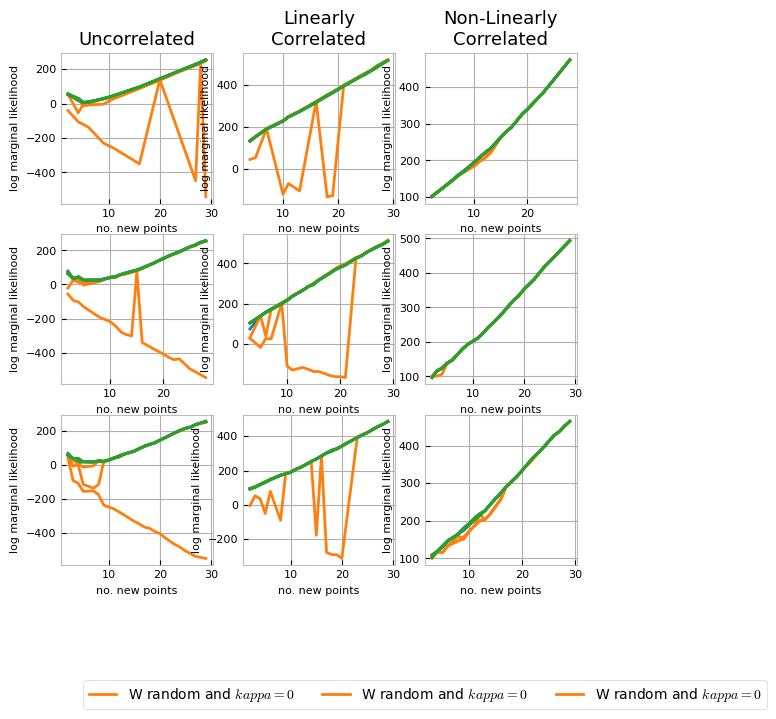

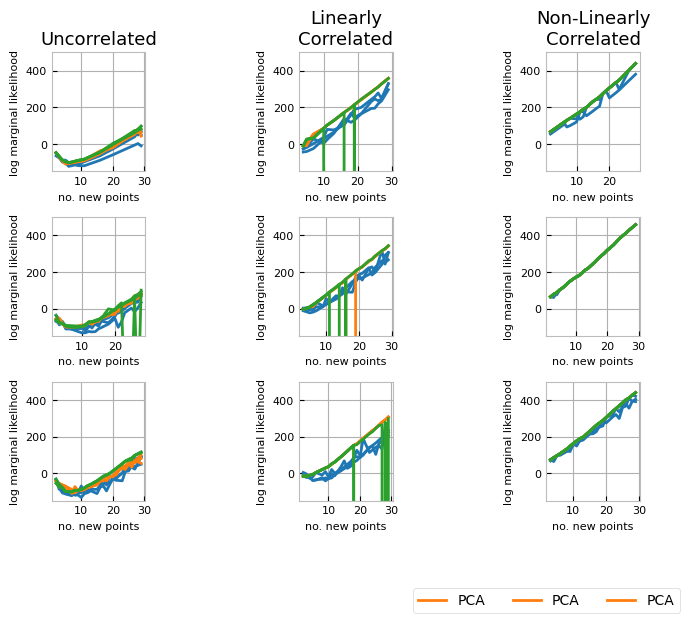

In [38]:
inch_conversion = 1/25.4
page_width = 169 *inch_conversion

seed = 1
data_seed = 1

surface_type_names = {'unrelated': 'Uncorrelated',
                          'linear_relation': 'Linearly\nCorrelated',
                          'non-linear_relation': 'Non-Linearly\nCorrelated'}

surface_types = ['unrelated', 'linear_relation', 'non-linear_relation']

mod_names = {'mo_indi': 'MOGP', 'lmc': 'LMC', 'avg': 'AvgGP', 'lvmogp': 'LVMOGP'}

labels = {'mo_indi': {'random restart 1': 'random', 'random restart 2': 'random', 'random restart 3': 'random'},
          'lmc': {'random_W_and_k': 'both W and $kappa$ random',
                  'random_W_and_k_0': 'W random and $kappa=0$',
                  'random_W_and_k_1': 'W random and $kappa=1$'},
          'lvmogp': {
              'random': 'random',
              'gpy': 'gpy',
              'mo_pca': 'PCA'},
          'avg': {'random restart 1': 'random', 'random restart 2': 'random', 'random restart 3': 'random'}}
seed=3
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(page_width, page_width))
    # ax = axs.flatten()
    for j, seed in enumerate([1, 2, 3]):
        for k, surface_type in enumerate(surface_types):
            hyp_df_model = hyp_df[
                (hyp_df['model'] == model_name) & (hyp_df['seed'] == seed) & (hyp_df['data_seed'] == data_seed)
                & (hyp_df['surface_type'] == surface_type)]
            for i, init_name in enumerate(hyp_df_model['init_type'].unique()):
                for restart in hyp_df_model['restart'].unique():
                    df = hyp_df_model[(hyp_df_model['init_type'] == init_name)
                                      & (hyp_df_model['restart'] == restart)]
                    if (j==2) & (k==2) & (i==1):
                        label = labels[model_name][init_name]
                    else:
                        label = None
                    axs[j,k].plot(df['n_new_points'], df['final_lml'], color=colors[i],
                               label=label)
            axs[0, k].set_title(surface_type_names[surface_type])
            axs[j,k].set_ylabel('log marginal likelihood')
            axs[j,k].set_xlabel('no. new points')
            if model_name == 'lvmogp':
                axs[j,k].set_ylim(-150, 500)
            # axs[0, k].set_title(mod_names[model_name])
    # plt.subplots(hspace=0.8)
    axs[2,2].legend(bbox_to_anchor=(0,-1), loc='lower center', ncol=len(hyp_df_model['init_type'].unique()))
    plt.tight_layout()
    # if save:
    #     plt.savefig(path / f'{file_name}_seed_{seed}_dataseed_{data_seed}_{model_name}.svg', bbox_inches='tight')
    #     plt.savefig(path / f'{file_name}_seed_{seed}_dataseed_{data_seed}_{model_name}.png', dpi=500, bbox_inches='tight')


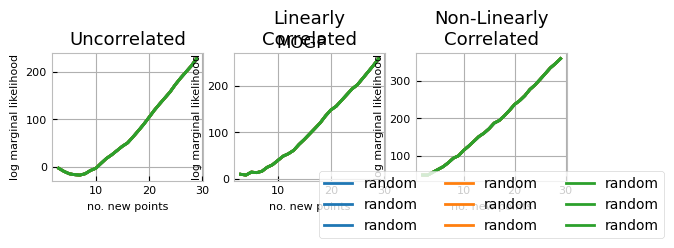

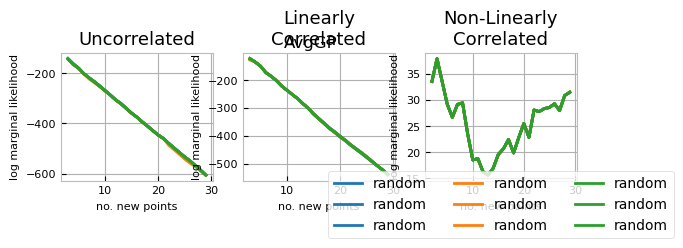

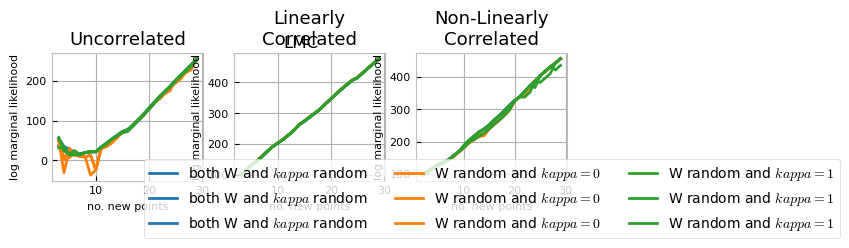

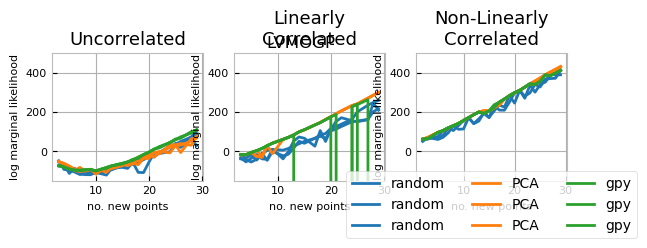

In [39]:
seed = 3
data_seed = 3

surface_type_n2mes = {'unrelated': 'Uncorrelated',
                          'linear_relation': 'Linearly\nCorrelated',
                          'non-linear_relation': 'Non-Linearly\nCorrelated'}

surface_types = ['unrelated', 'linear_relation', 'non-linear_relation']

mod_names = {'mo_indi': 'MOGP', 'lmc': 'LMC', 'avg': 'AvgGP', 'lvmogp': 'LVMOGP'}

labels = {'mo_indi': {'random restart 1': 'random', 'random restart 2': 'random', 'random restart 3': 'random'},
          'lmc': {'random_W_and_k': 'both W and $kappa$ random',
                  'random_W_and_k_0': 'W random and $kappa=0$',
                  'random_W_and_k_1': 'W random and $kappa=1$'},
          'lvmogp': {
              'random': 'random',
              'gpy': 'gpy',
              'mo_pca': 'PCA'},
          'avg': {'random restart 1': 'random', 'random restart 2': 'random', 'random restart 3': 'random'}}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(page_width, page_width/4))
    ax = axs.flatten()
    for k, surface_type in enumerate(surface_types):
        hyp_df_model = hyp_df[
            (hyp_df['model'] == model_name) & (hyp_df['seed'] == seed) & (hyp_df['data_seed'] == data_seed)
            & (hyp_df['surface_type'] == surface_type)]
        for i, init_name in enumerate(hyp_df_model['init_type'].unique()):
            for restart in hyp_df_model['restart'].unique():
                df = hyp_df_model[(hyp_df_model['init_type'] == init_name)
                                  & (hyp_df_model['restart'] == restart)]
                if (model_name == 'avg') or (model_name == 'm_indi'):
                    color = 'green'
                else:
                    color=colors[i]
                ax[k].plot(df['n_new_points'], df['final_lml'], color=colors[i],
                           label=labels[model_name][init_name])
        ax[k].set_title(surface_type_names[surface_type])
        ax[k].set_ylabel('log marginal likelihood')
        ax[k].set_xlabel('no. new points')
        if model_name == 'lvmogp':
            ax[k].set_ylim(-150, 500)
    plt.suptitle(mod_names[model_name])
    # plt.subplots(hspace=0.8)
    ax[2].legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol=len(hyp_df_model['init_type'].unique()))
    # if save:
    #     plt.savefig(path / f'{file_name}_seed_{seed}_dataseed_{data_seed}_{model_name}.svg', bbox_inches='tight')
    #     plt.savefig(path / f'{file_name}_seed_{seed}_dataseed_{data_seed}_{model_name}.png', dpi=500, bbox_inches='tight')


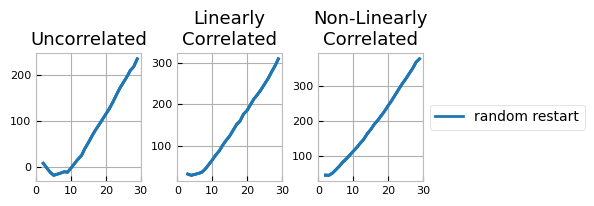

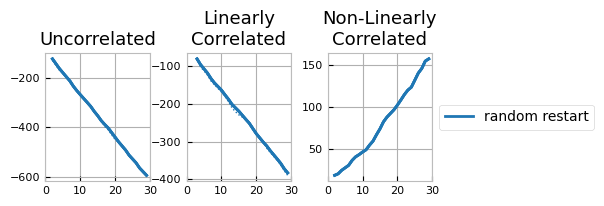

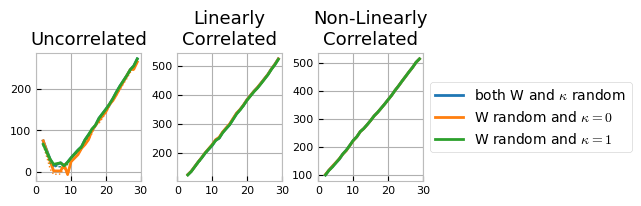

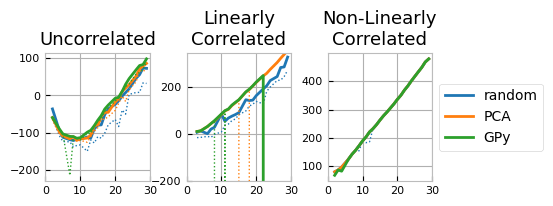

In [47]:
import pandas as pd
import matplotlib as mpl

mpl.style.use('mystyle.mplstyle')

labels = {'mo_indi': {'random restart 1': 'random', 'random restart 2': 'random', 'random restart 3': 'random'},
          'lmc': {'random_W_and_k': 'both W and $\kappa$ random',
                  'random_W_and_k_0': 'W random and $\kappa=0$',
                  'random_W_and_k_1': 'W random and $\kappa=1$'},
          'lvmogp': {
              'random': 'random',
              'gpy': 'GPy',
              'mo_pca': 'PCA'},
          'avg': {'random restart 1': 'random', 'random restart 2': 'random', 'random restart 3': 'random'}}

seed=2
data_seed = 3
seeds = [1, 2, 3]
for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(page_width*0.75, page_width/4))
    ax = axs.flatten()
    for j, surface_type in enumerate(surface_types):
        hyp_df_model = hyp_df[
            (hyp_df['model'] == model_name) & (hyp_df['seed'] == seed) & (hyp_df['data_seed'] == data_seed)
            & (hyp_df['surface_type'] == surface_type)]
        for metric in ['final_lml']:
            colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
            for i, init_name in enumerate(hyp_df_model['init_type'].unique()):
                df = hyp_df_model[(hyp_df_model['init_type'] == init_name)]
                dfs_max = []
                dfs_min = []
                for n_train in df['n_new_points'].unique():
                    df_max = df[(df['n_new_points'] == n_train)]
                    df_max = df_max[df_max[metric] == df_max[metric].max()]
                    df_min = df[(df['n_new_points'] == n_train)]
                    df_min = df_min[df_min[metric] == df_min[metric].min()]
                    dfs_min.append(df_min)
                    dfs_max.append(df_max)
                dfs_min = pd.concat(dfs_min)
                dfs_max = pd.concat(dfs_max)
                x = dfs_max['n_new_points']
                y = dfs_max[metric]
                x2 = dfs_min['n_new_points']
                y2 = dfs_min[metric]
                ax[j].set_title(surface_type_names[surface_type])
                if (model_name == 'avg') or (model_name == 'mo_indi'):
                    color = colors[0]
                else:
                    color=colors[i]
                ax[j].plot(x, y, label = labels[model_name][init_name], color=color)
                ax[j].plot(x2, y2, linewidth=1, linestyle=":", color=color)
                ax[j].set_xlim(0, 30)
                if (model_name == 'lvmogp') & (j==1):
                    ax[j].set_ylim(-200, None)
                # results_df[results_df['index']==model].plot(x='n_train', y=metric, ax=ax,)
                # ax[j].set_title(f'{model} {metric} {seed}')
    if (model_name == 'avg') or (model_name == 'mo_indi'):
        ax[2].legend(['random restart'],loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.subplots_adjust(wspace=0.35)
    plt.savefig(pl.Path().home()/f'{surface_type}_{model_name}_{metric}.svg', bbox_inches='tight')